# lab1 代码部分


库导入

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt


定义插值函数构建

In [2]:
def Linterpolation(ra:np.ndarray,f,x:sp.symbols):
    """
    Linear interpolation.
    :param ra:插值x序列
    :param r:由于是一元表达式，所以只用传入一个一元变量
    :param f:传入函数表达式
    :return:返回一个sympy表达式，后续可以带入实际值运算
    """
    y = 0
    
    n=ra.size
    for k in range(0,n):
        l=1
        for j in range(0,n):
            if j==k:
                continue
            else:
                l=l*(x-ra[j])/(ra[k]-ra[j])
        y=y+l*f(ra[k])
    return y


用平均相对误差来评价差值的准确性

In [3]:
def judge(reals :np.array,evals :np.array):
    """
    判断插值结果是否正确
    :param reals:真实值
    :param evals:插值结果
    :return:
    """
    n=reals.size
    ans=np.zeros(n)
    for i in range(0,n):
        ans[i]=abs((reals[i]-evals[i])/evals[i])

    return np.average(ans)


可视化

In [4]:
def draw(y1,y2,x):
    """
    画图
    :param f_real:真实值
    :param f_eval:插值结果
    :param range:插值范围
    :return:
    """

    plt.plot(x,y1,label='real')
    plt.plot(x,y2,label='interpolation')
    plt.legend()
    plt.show()

## 问题一

### (1)

定义f(x)
$$
f(x) =  \frac{1}{1+x^2}   
$$

In [5]:
def f1(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return 1/(1+x**2);

设置变量和验证数据列

In [6]:

evals = np.array([0.75,1.75,2.75,3.75,4.75])
# result_L=np.zeros(evals.size)
result_R=np.array([i for i in f1(evals)])

根据不同差值次数n得出结果

n= 20
0.75 : 0.636755335916433 : 0.64
1.75 : 0.238445933738133 : 0.24615384615384617
2.75 : 0.0806599934216556 : 0.11678832116788321
3.75 : -0.447051960708837 : 0.06639004149377593
4.75 : -39.9524490330416 : 0.042440318302387266
jud: 0.5269797432824406
[0.03846154 0.0454402  0.05446293 0.06639004 0.08256881 0.10518627
 0.13793103 0.18725618 0.26470588 0.3902439  0.59016393 0.85207101
 1.         0.85207101 0.59016393 0.3902439  0.26470588 0.18725618
 0.13793103 0.10518627 0.08256881 0.06639004 0.05446293 0.0454402
 0.03846154]
[0.0384615384938274 0 0 -0.447051960708827 0 0 0.137931034482759 0 0
 0.395093053687779 0 0 1.00000000000000 0 0 0.395093053687780 0 0
 0.137931034482759 0 0 -0.447051960708837 0 0 0.0384615384615385]


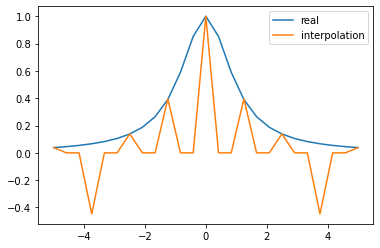

In [7]:
for n in [20]:
    print("n=",n)
    ra=np.linspace(-5,5,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f1,x)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        print(evals[i],":",result_L[i],":",result_R[i])
    jud=judge(result_R,result_L)

    print("jud:",jud)

    xr=np.linspace(-5,5,30)
    yr1=np.array([f1(i) for i in xr])
    yr2=np.array([y.evalf(subs={x:i}) for i in xr])
    print(yr1)
    print(yr2)
    draw(yr1,yr2,xr) 